In [1]:
import json 
import matplotlib.pyplot as plt 
import os 
from datasets import load_dataset
from PIL import Image
import math
from datasets import Dataset


/home/kevinteng/Desktop/dev/llm/personal_projects/healthcare/trauma_thompson/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EDA for Unsloth Dataset
based on: https://docs.unsloth.ai/models/qwen3-vl-how-to-run-and-fine-tune

In [2]:
dataset = load_dataset("unsloth/LaTeX_OCR", split="train")

In [3]:
type(dataset)

datasets.arrow_dataset.Dataset

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40 at 0x7312C754D430>, 'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}


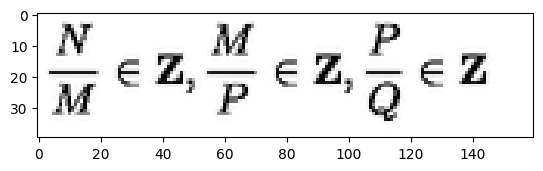

In [4]:
for sample in dataset:
    print(sample)
    plt.imshow(sample["image"])
    plt.show()
    break 


In [5]:
def convert_to_conversation(sample):
    instruction = "Write the LaTeX representation for this image."
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": instruction},
                {"type": "image", "image": sample["image"]},
            ],
        },
        {"role": "assistant", "content": [{"type": "text", "text": sample["text"]}]},
    ]
    return {"messages": conversation}

In [6]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

In [7]:
converted_dataset[1]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTeX representation for this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=120x50>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'D _ { \\mu } ^ { \\alpha \\beta } \\bar { A } _ { \\mu } ^ { \\alpha \\beta } = 0 ,'}]}]}

# EDA on Proprietary Dataset

In [8]:
data_dir = "/home/kevinteng/Desktop/dataset/trauma_thompson_dataset/task5_vqa/data"
image_dir = os.path.join(data_dir, "train")
answer_pth = os.path.join(data_dir, "train_annotations.json")
question_pth = os.path.join(data_dir, "train_questions.json")

In [9]:
with open(answer_pth, "r") as f:
    answers = json.load(f)

with open(question_pth, "r") as f:
    questions = json.load(f)

One question could have multiple answers

In [10]:
questions["questions"][0]

{'image_id': 21100000,
 'question': 'What limb is injured?',
 'question_id': 21100000000}

In [11]:
answers["annotations"][0]

{'question_type': 'what',
 'multiple_choice_answer': ' no limb is injured',
 'answers': [{'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 1},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 2},
  {'answer': ' left arm', 'answer_confidence': 'maybe', 'answer_id': 3},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 4},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 5},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 6},
  {'answer': ' right leg', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 8},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 9},
  {'answer': ' no limb is injured',
   'answer_confidence': 'yes',
   'answer_id': 10}],
 'image_id': 21100000,
 'question_id': 21100000000}

In [12]:
# intended format derived from Qwen3-VL unsloth fine tuning
# def convert_to_conversation(sample):
#     instruction = "Write the LaTeX representation for this image."
#     conversation = [
#         {
#             "role": "user",
#             "content": [
#                 {"type": "text", "text": instruction},
#                 {"type": "image", "image": sample["image"]},
#             ],
#         },
#         {"role": "assistant", "content": [{"type": "text", "text": sample["text"]}]},
#     ]
#     return {"messages": conversation}

def get_vqa_data(question_id, plot=False, image_size=(256, 256)):
    question = questions["questions"][question_id]
    answer = answers["annotations"][question_id]
    image = Image.open(os.path.join(image_dir, str(question["image_id"])+".jpg"))
    image = image.resize(image_size)
    if plot:
        plt.imshow(image)
        plt.show()
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": question["question"]},
                {"type": "image", "image": image},
            ],
        },
        {"role": "assistant", "content": [{"type": "text", "text": answer["multiple_choice_answer"]}]},
    ]
    return {"messages": conversation}

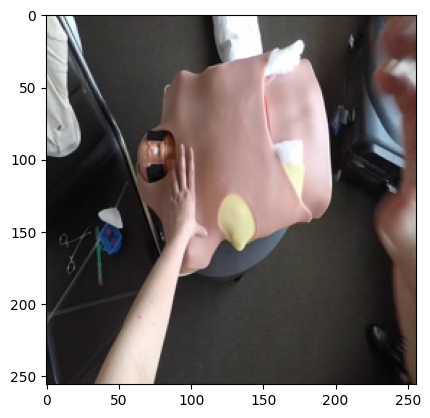

In [13]:
message = get_vqa_data(0, plot=True)

In [14]:
message

{'messages': [{'role': 'user',
   'content': [{'type': 'text', 'text': 'What limb is injured?'},
    {'type': 'image',
     'image': <PIL.Image.Image image mode=RGB size=256x256>}]},
  {'role': 'assistant',
   'content': [{'type': 'text', 'text': ' no limb is injured'}]}]}